# Using Machine Learning Tools Assignment 1

## Overview

In this assignment, you will apply some popular machine learning techniques to the problem of predicting bike rental demand. A data set has been provided containing records of bike rentals in Seoul, collected during 2017-18.

The main aims of the prac are: 

- to practice using tools for loading and viewing data sets;
- to visualise data in several ways and check for common pitfalls;
- to plan a simple experiment and prepare the data accordingly;
- to run your experiment and to report and interpret your results clearly and concisely.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## General instructions

This assignment is divided into several tasks. Use the spaces provided in this notebook to answer the questions posed in each task. Note that some questions require writing a small amount of code, some require graphical results, and some require comments or analysis as text. It is your responsibility to make sure your responses are clearly labelled and your code has been fully executed (with the correct results displayed) before submission!

**Do not** manually edit the data set file we have provided! For marking purposes, it's important that your code is written to run correctly on the original data file.

When creating graphical output, label is clearly, with appropriate titles, xlabels and ylabels, as appropriate.

Most of the tasks in this assignment only require writing a few lines of code! One goal of the assignment is explore [sklearn](https://scikit-learn.org/stable/index.html), [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), [matplotlib](https://matplotlib.org/stable/index.html) and other libraries you will find useful throughout the course, so feel free to use the functions they provide. You are expected to search and carefully read the documentation for functions that you use, to ensure you are using them correctly.

Chapter 2 of the reference book is based on a similar workflow to this prac, so you may look there for some further background and ideas. You can also use any other general resources on the internet that are relevant although do not use ones which directly relate to these questions with this dataset (which would normally only be found in someone else's assignment answers). If you take a large portion of code or text from the internet then you should reference where this was taken from, but we do not expect any references for small pieces of code, such as from documentation, blogs or tutorials. Taking, and adapting, small portions of code is expected and is common practice when solving real problems.

The following code imports some of the essential libraries that you will need. You should not need to modify it, but you are expected to import other libraries as needed.


In [44]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import pandas as pd
assert pd.__version__ >= "1.0"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [45]:
import seaborn as sns   

## Step 1: Loading and initial processing of the dataset (20%)

Download the data set from MyUni using the link provided on the assignment page. A paper that describes one related version of this dataset is: Sathishkumar V E, Jangwoo Park, and Yongyun Cho. 'Using data mining techniques for bike sharing demand prediction in metropolitan city.' Computer Communications, Vol.153, pp.353-366, March, 2020. Feel free to look at this if you want more information about the dataset.

The data is stored in a CSV (comma separated variable) file and contains the following information 

 - Date: year-month-day
 - Rented Bike Count: Count of bikes rented at each hour
 - Hour: Hour of the day
 - Temperature: Temperature in Celsius
 - Humidity: %
 - Windspeed: m/s
 - Visibility: 10m
 - Dew point temperature: Celsius
 - Solar radiation: MJ/m2
 - Rainfall: mm
 - Snowfall: cm
 - Seasons: Winter, Spring, Summer, Autumn
 - Holiday: Holiday/No holiday
 - Functional Day: NoFunc(Non Functional Hours), Fun(Functional hours)

**Load the data set from the csv file into a DataFrame, and summarise it with at least two appropriate pandas functions.**

In [46]:
# read the data
df = pd.read_csv('SeoulBikeData.csv')
df.head(10)

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0,0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0,0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0,0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0,0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0,0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0,0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0,0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0,0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0,0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0,0,Winter,No Holiday,Yes


In [47]:
#summarise it with the info() method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature (C)            8760 non-null   float64
 4   Humidity (%)               8760 non-null   int64  
 5   Wind speed (m/s)           8759 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature (C)  8759 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8758 non-null   object 
 10  Snowfall (cm)              8760 non-null   object 
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [48]:
#summarise it with the describe() method
df.describe()

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2)
count,8760.000000,8760.000000,8760.000000,8760.000000,8759.000000,8760.000000,8759.000000,8760.000000
mean,704.602055,11.502740,12.914361,58.240183,1.953237,1436.442808,4.074369,0.569111
std,644.997468,6.922779,12.347109,20.584774,21.376612,608.827735,13.061011,0.868746
min,0.000000,0.000000,-17.800000,-26.000000,0.000000,-678.000000,-30.600000,0.000000
25%,191.000000,6.000000,3.500000,42.000000,0.900000,939.500000,-4.700000,0.000000
50%,504.500000,12.000000,13.700000,57.000000,1.500000,1697.500000,5.100000,0.010000
75%,1065.250000,18.000000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000
max,3556.000000,24.000000,306.000000,309.000000,2000.000000,2000.000000,27.200000,3.520000


### 1.2 Initial visualisation

To get a feeling for the data it is a good idea to do some form of simple visualisation.  **Display a set of histograms for the features** as they are right now, prior to any cleaning steps.

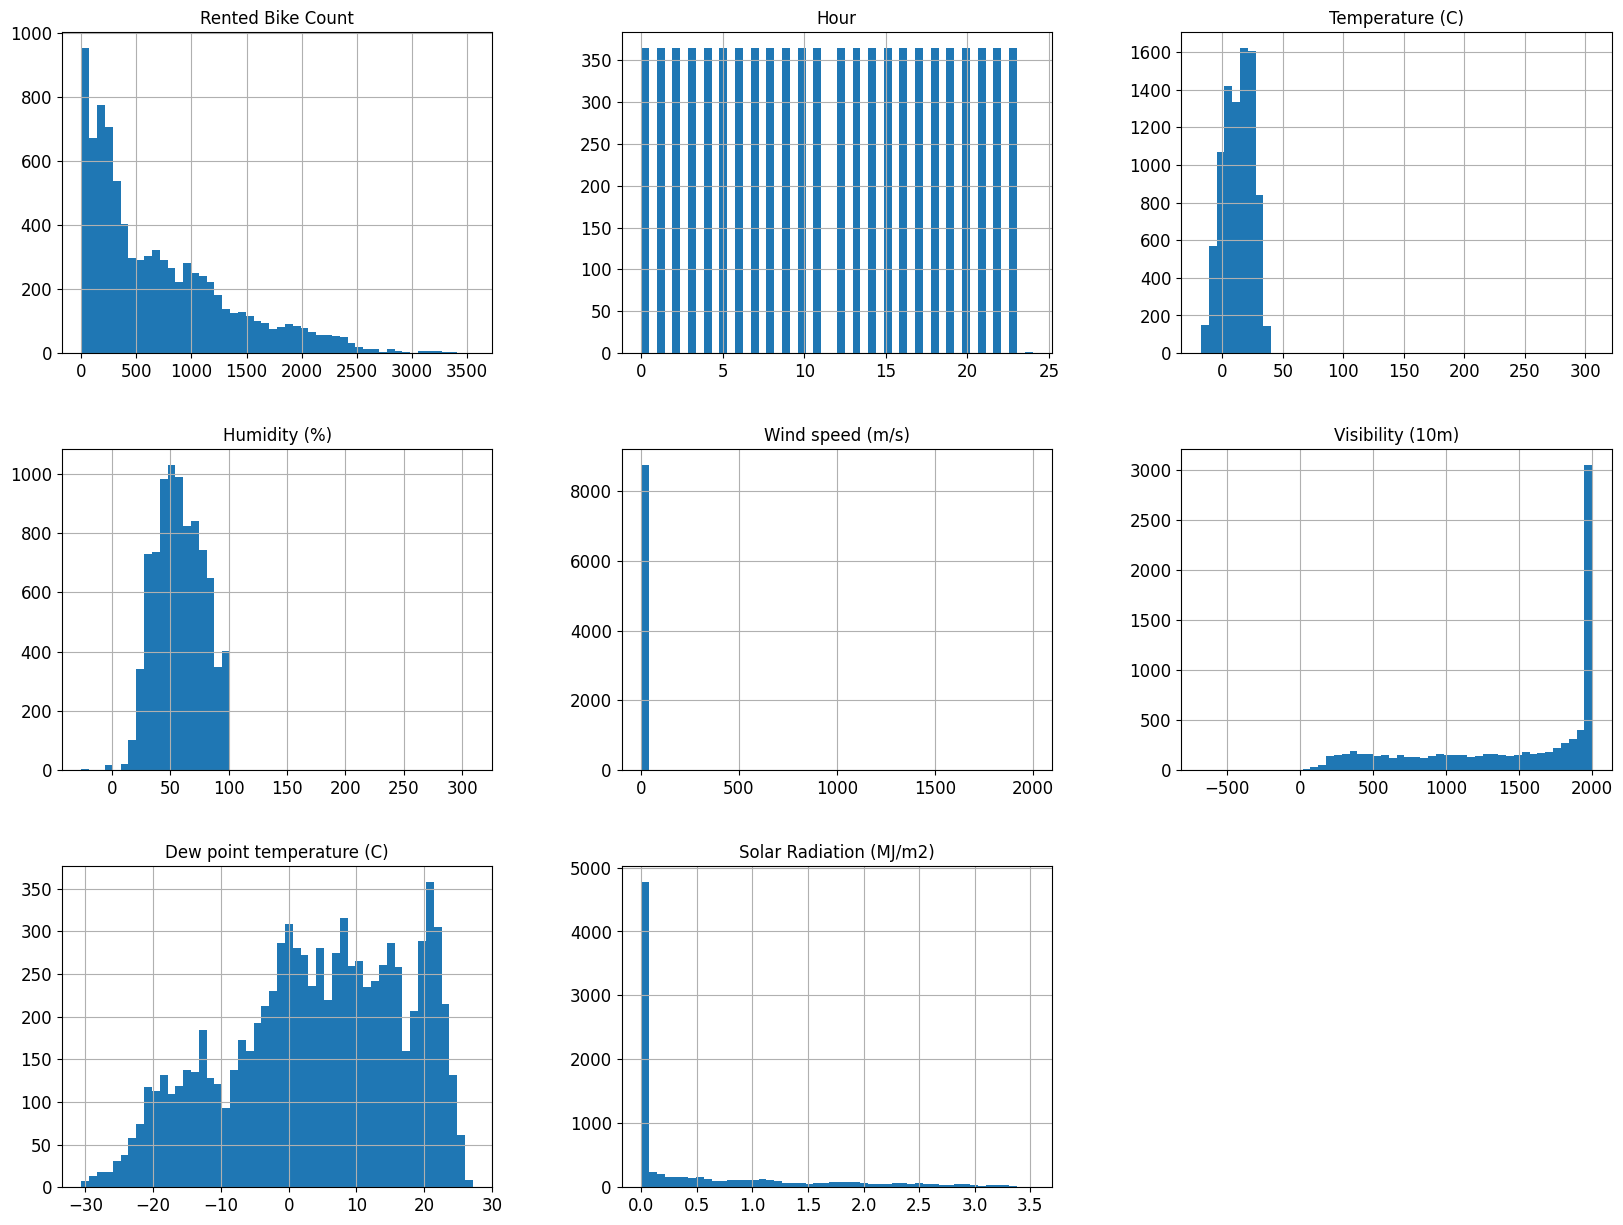

In [49]:
#display a set of histograms for the features
df.hist(bins=50, figsize=(20,15))
plt.show()

### 1.3 Removing unwanted information

The "Functioning day" feature records whether the bike rental was open for business on that day. For this assignment we are only interested in predicting demand on days when the business is open, so **remove rows from the DataFrame where the business is closed.** Hint: you can use the `DataFrame.loc()` function to do this. As a sanity check, ensure that the rows you are removing contain zero bike rentals! **After doing this, delete the Functioning Day feature from the DataFrame** and verify that this worked.

In [50]:
# Keep only the rows where 'Functioning Day' is 'Yes'
df = df.loc[df['Functioning Day'] == 'Yes']

# Sanity check to make sure no 'Rented Bike Count' is zero
assert df['Rented Bike Count'].min() > 0, "Some bike counts are zero!"

In [51]:
#delete the 'Functioning Day' feature
df = df.drop('Functioning Day', axis=1)
print(df.columns)
df.head(10)

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature (C)', 'Humidity (%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature (C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday'],
      dtype='object')


,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0,0,Winter,No Holiday
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0,0,Winter,No Holiday
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0,0,Winter,No Holiday
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0,0,Winter,No Holiday
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0,0,Winter,No Holiday
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0,0,Winter,No Holiday
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0,0,Winter,No Holiday
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0,0,Winter,No Holiday
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0,0,Winter,No Holiday
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0,0,Winter,No Holiday


### 1.4 Numerical encoding

The main task is to predict future bike rental demand from this data. Hence the target feature is "Bike Rental Count". You will use regression techniques to do this, but this requires that the other features are numerical.

The Holiday and Season features both need to be converted to a simple numerical format. **Write code to convert the Holiday feature to 0 or 1 from its current format.** 

In [52]:
# convert the 'Holiday' feature to a binary feature
df['Holiday'] = df['Holiday'].map({'No Holiday': 0, 'Holiday': 1})
df.head()

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,Winter,0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,Winter,0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,Winter,0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,Winter,0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,Winter,0


The Season feature is a little tricker. A number could be assigned to each season, but a better solution in this case is to **add 4 new columns**, each labelled by a season, and each storing 0 or 1 according to the season in each row. In other words, the "Winter" column contains 1 whenever the season is winter, and 0 elsewhere. **Do this for each season. Afterwards, remember to delete the Season feature.**

In [53]:
# convert the 'Seasons' feature to a one-hot vector
df = pd.get_dummies(df, columns=['Seasons'])
# rename the columns
df = df.rename(columns={'Seasons_Spring': 'Spring', 'Seasons_Summer': 'Summer', 'Seasons_Autumn': 'Autumn', 'Seasons_Winter': 'Winter'})
for season in ['Spring', 'Summer', 'Autumn', 'Winter']:
    df[season] = df[season].astype(int)
df.head()

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Autumn,Spring,Summer,Winter
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,0,0,0,0,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,0,0,0,0,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,0,0,0,0,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,0,0,0,0,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,0,0,0,0,1


It is known that bike rentals depend strongly on whether it's a weekday or a weekend. **Replace the Date feature with a Weekday feature that stores 0 or 1 depending on whether the date represents a weekend or weekday.**  To do this, use the function `date_is_weekday` below, which returns 1 if it is a weekday and 0 if it is a weekend.

**Apply the function to the Date column in your DataFrame** (you can use `DataFrame.transform` to apply it).

In [54]:
import datetime
def date_is_weekday(datestring):
    ### return 0 if weekend, 1 if weekday
    dsplit = datestring.split('/')
    wday = datetime.datetime(int(dsplit[2]),int(dsplit[1]),int(dsplit[0])).weekday()
    return int(wday<=4)

# convert the 'Date' feature to a binary feature called 'Weekday'
df['Weekday'] = df['Date'].transform(date_is_weekday)
df = df.drop('Date', axis=1)
df.head()

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Autumn,Spring,Summer,Winter,Weekday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,0,0,0,0,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,0,0,0,0,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,0,0,0,0,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,0,0,0,0,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,0,0,0,0,1,1


**Convert all the remaining data to numerical format**, with any non-numerical entries set to NaN.

In [55]:
# convert all the remaining data to numerical format, with any non-numerical entries set to NaN
df = df.apply(pd.to_numeric, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8465 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8465 non-null   int64  
 1   Hour                       8465 non-null   int64  
 2   Temperature (C)            8465 non-null   float64
 3   Humidity (%)               8465 non-null   int64  
 4   Wind speed (m/s)           8464 non-null   float64
 5   Visibility (10m)           8465 non-null   int64  
 6   Dew point temperature (C)  8464 non-null   float64
 7   Solar Radiation (MJ/m2)    8465 non-null   float64
 8   Rainfall(mm)               8440 non-null   float64
 9   Snowfall (cm)              8442 non-null   float64
 10  Holiday                    8465 non-null   int64  
 11  Autumn                     8465 non-null   int64  
 12  Spring                     8465 non-null   int64  
 13  Summer                     8465 non-null   int64  
 1

## Step 2: Visualise the data and perform further processing (20%)

### 2.1 Visualisation

Use **at least two graphical methods to display your data** and **identify** problematic entries. **Write one sentence** that summarises what you found about problematic entries.

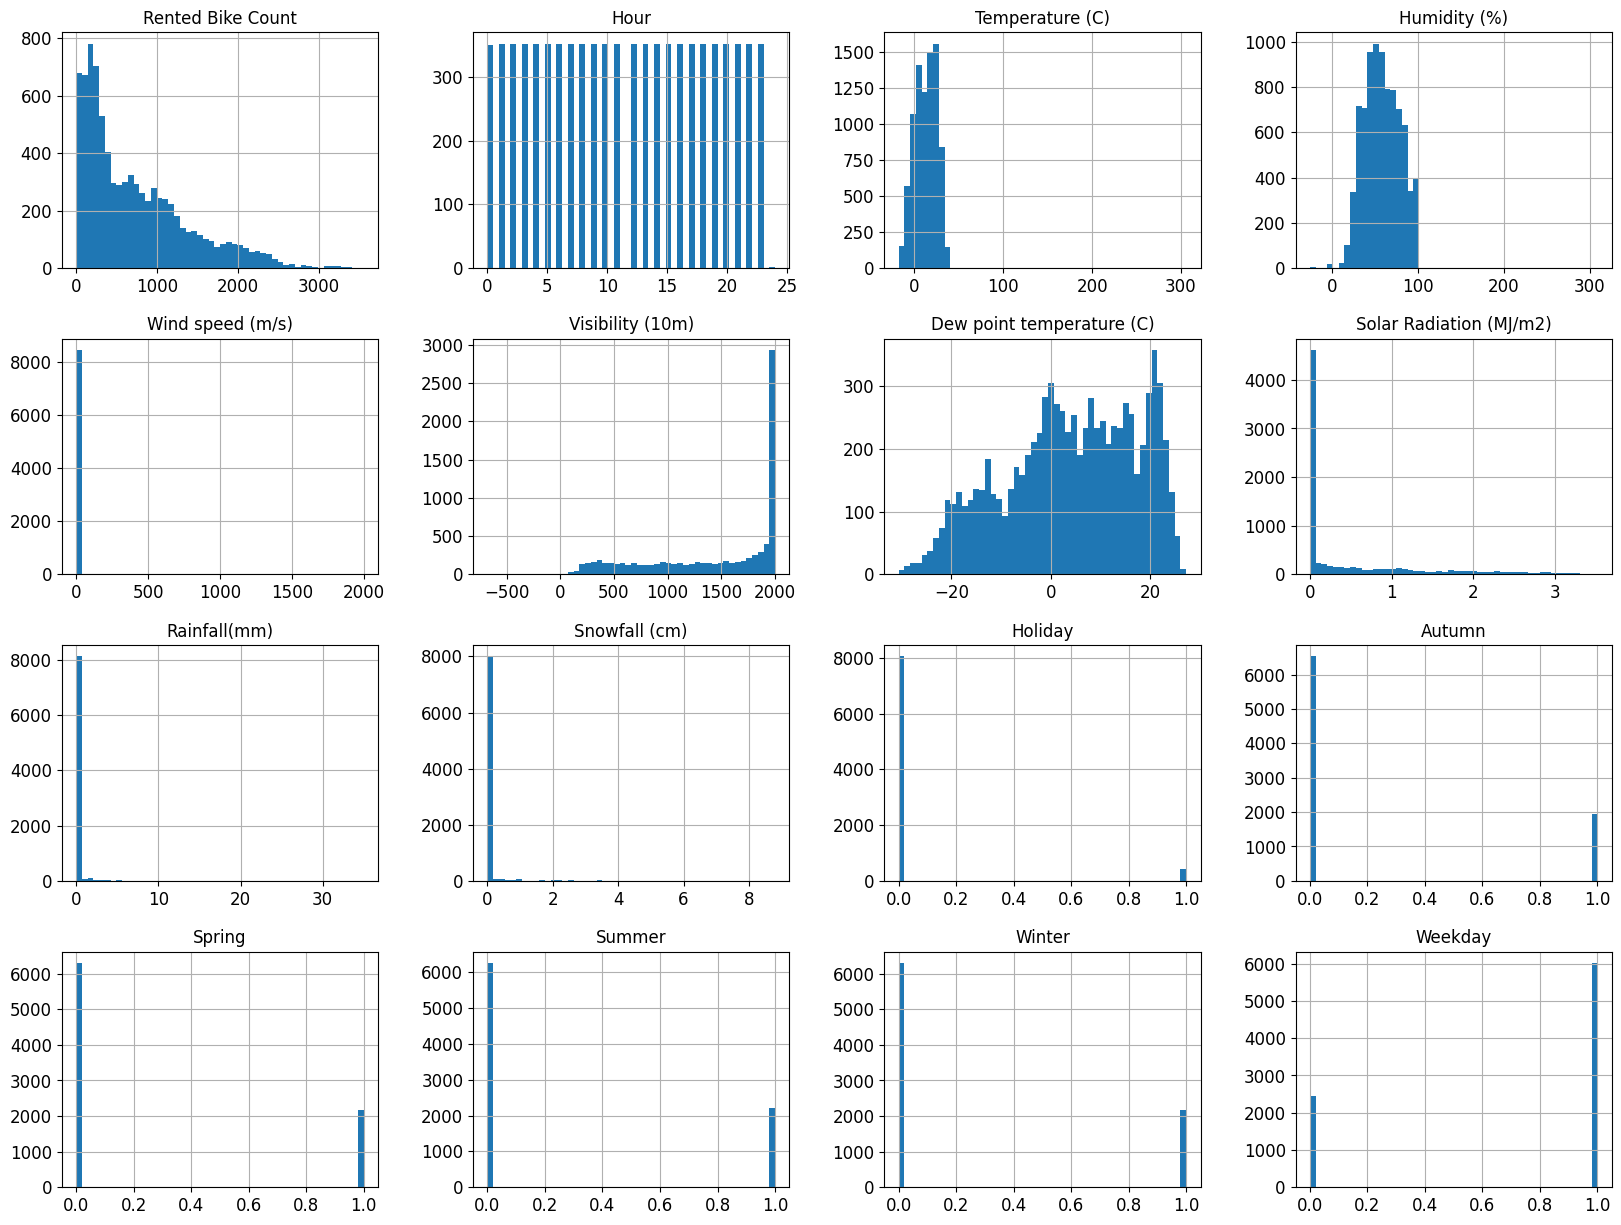

In [57]:
#plot histogram to identify problematic entries
df.hist(bins=50, figsize=(20,15))
plt.show()

In [58]:
# Checking for null values
df.isnull().sum()

Rented Bike Count             0
Hour                          0
Temperature (C)               0
Humidity (%)                  0
Wind speed (m/s)              1
Visibility (10m)              0
Dew point temperature (C)     1
Solar Radiation (MJ/m2)       0
Rainfall(mm)                 25
Snowfall (cm)                23
Holiday                       0
Autumn                        0
Spring                        0
Summer                        0
Winter                        0
Weekday                       0
dtype: int64

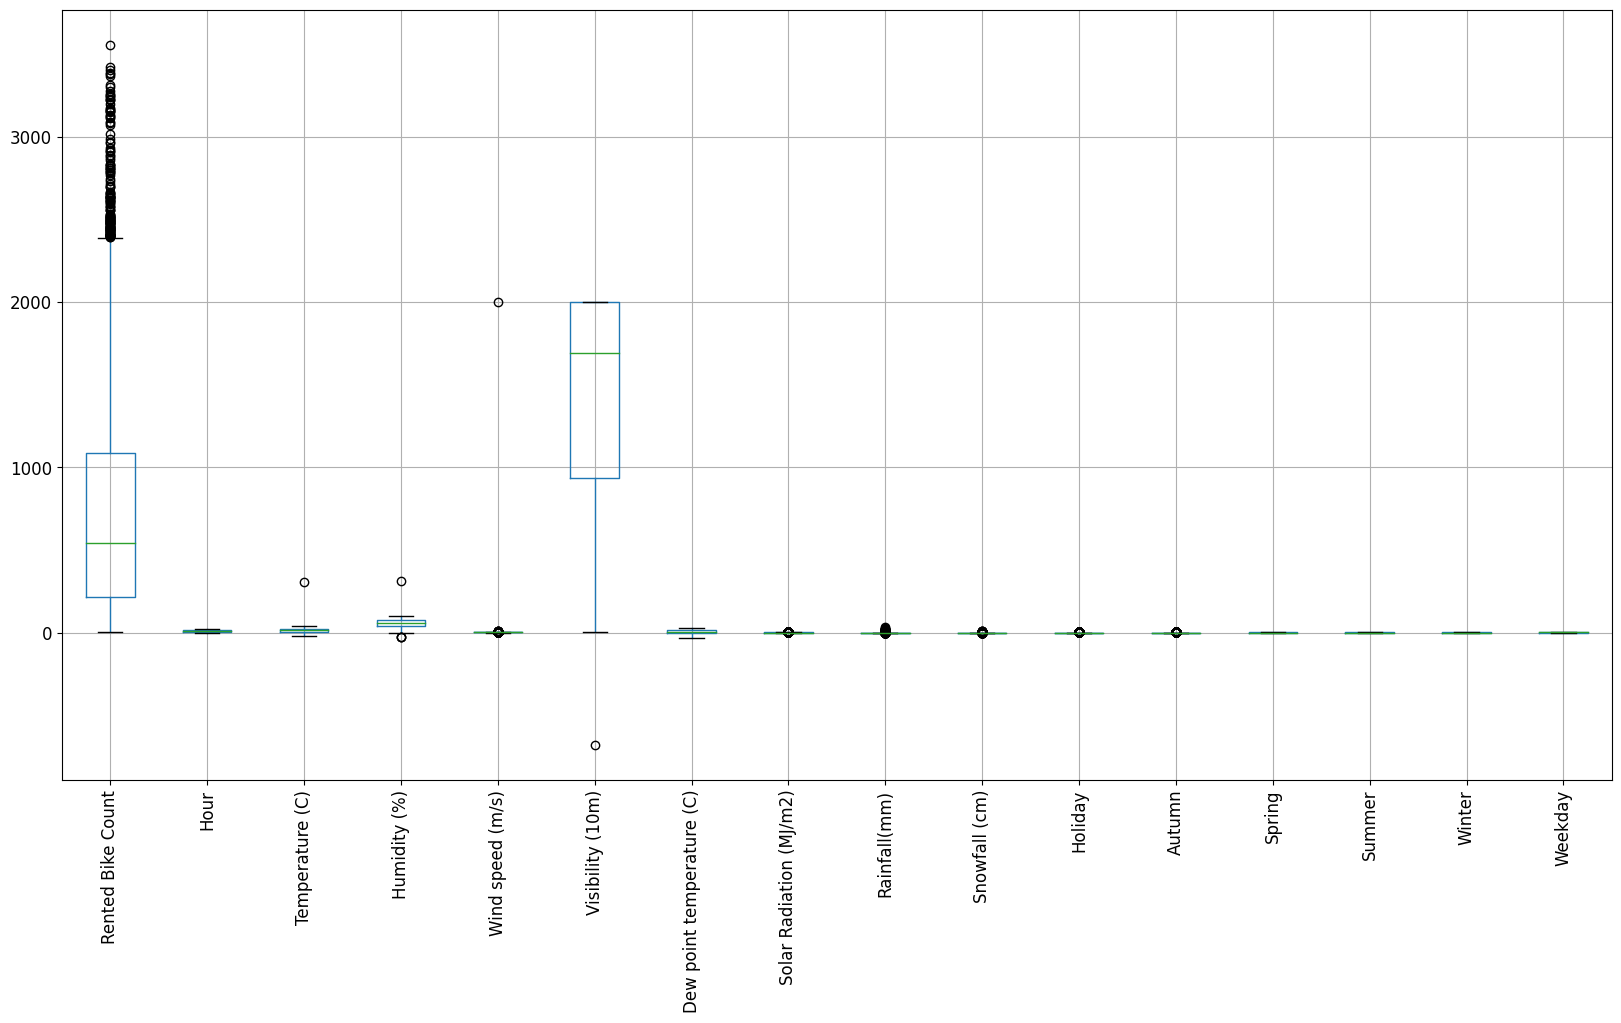

In [59]:
# Using boxplots to identify potential outliers
df.boxplot(figsize=(20,10))
plt.xticks(rotation=90)
plt.show()

In [60]:
### Your summary sentence about problematic entries
"""
the problematic entries in this dataset are primarily in the 'Rainfall(mm)' and 'Snowfall (cm)' columns, 
which have a significant number of zero and null values and ouliers, possibly indicating missing or unrecorded data.
"""

"\nthe problematic entries in this dataset are primarily in the 'Rainfall(mm)' and 'Snowfall (cm)' columns, \nwhich have a significant number of zero and null values and ouliers, possibly indicating missing or unrecorded data.\n"

### 2.2 Imputation and Pre-Processing

**Set any problematic values** in the numerical data to `np.nan` and check that this has worked. Once this is done, specify a **sklearn *pipeline* that will perform imputation** to replace problematic entries (nan values) with an appropriate **median** value ***and* any other pre-processing** that you think should be used. Just specify the pipeline - do ***not*** run it now.

In [61]:
# Set problematic values to np.nan
df.loc[df['Rainfall(mm)'] == 0, 'Rainfall(mm)'] = np.nan
df.loc[df['Snowfall (cm)'] == 0, 'Snowfall (cm)'] = np.nan

# Check that this has worked
df.isnull().sum()

Rented Bike Count               0
Hour                            0
Temperature (C)                 0
Humidity (%)                    0
Wind speed (m/s)                1
Visibility (10m)                0
Dew point temperature (C)       1
Solar Radiation (MJ/m2)         0
Rainfall(mm)                 7949
Snowfall (cm)                8022
Holiday                         0
Autumn                          0
Spring                          0
Summer                          0
Winter                          0
Weekday                         0
dtype: int64

In [62]:
#sklearn pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Define pre-processing pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Imputation to replace missing values with the median
    ('scaler', StandardScaler()),  # Standard scaling to normalize feature values
])

### 2.3 Correlation 

It is also useful to look at how strongly correlated the features are to the desired target (Rented Bike Count). Before anything else is done it is necessary to **fit and apply the pipeline** above to make a *temporary* version of the whole dataset that is pre-processed. **Why is it important to not use this version of the pre-processed data again?**

In [63]:
# Fit and apply the pipeline to the whole dataset to create a temporary pre-processed version
df_temp = pd.DataFrame(pipeline.fit_transform(df), columns=df.columns)

# Display the first few rows of the pre-processed dataset
df_temp.head()

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Autumn,Spring,Summer,Winter,Weekday
0,-0.739759,-1.663109,-1.438597,-1.021689,0.010941,0.929396,-1.627128,-0.654079,-0.08629,-0.080359,-0.225032,-0.544722,-0.585308,-0.594041,1.708503,0.636563
1,-0.817603,-1.518615,-1.462568,-0.973409,-0.053449,0.929396,-1.627128,-0.654079,-0.08629,-0.080359,-0.225032,-0.544722,-0.585308,-0.594041,1.708503,0.636563
2,-0.865866,-1.374120,-1.502522,-0.925128,-0.044251,0.929396,-1.634680,-0.654079,-0.08629,-0.080359,-0.225032,-0.544722,-0.585308,-0.594041,1.708503,0.636563
3,-0.968619,-1.229626,-1.518503,-0.876848,-0.048850,0.929396,-1.627128,-0.654079,-0.08629,-0.080359,-0.225032,-0.544722,-0.585308,-0.594041,1.708503,0.636563
4,-1.013769,-1.085132,-1.502522,-1.069969,0.015540,0.929396,-1.702648,-0.654079,-0.08629,-0.080359,-0.225032,-0.544722,-0.585308,-0.594041,1.708503,0.636563


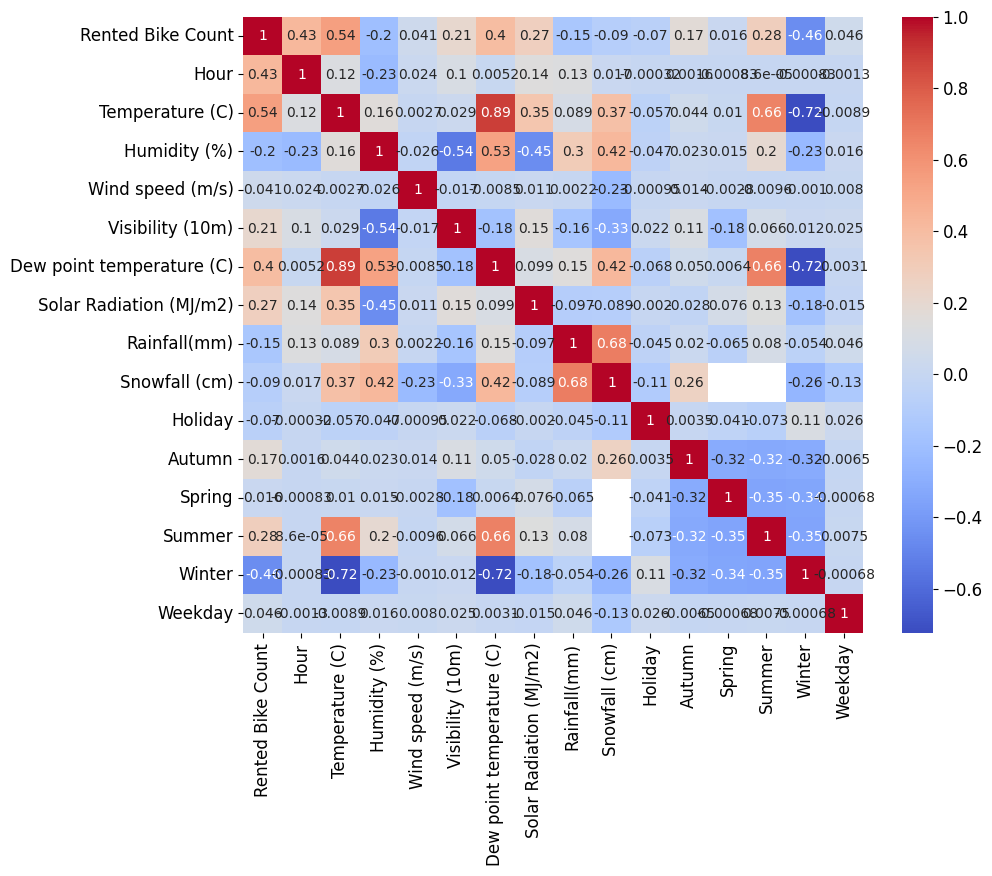

In [64]:
# Using a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [65]:
"""
Data Leakage: If we fit our preprocessing steps (like imputation or scaling) on the whole dataset, 
these steps will take into account information from the test set when computing the necessary 
parameters (like the median for imputation or the mean and standard deviation for scaling). 
This gives our model an unrealistic advantage and can lead to overly optimistic 
performance estimates when evaluating the model on the test set.

Simulating Real-World Conditions: In a real-world scenario, we would fit our preprocessing 
steps only on the training data, simulating the situation where we have to make predictions 
on new, unseen data. We want our model evaluation process to mimic this as closely as possible 
to get a realistic estimate of how the model is likely to perform on new data.
"""

'\nData Leakage: If we fit our preprocessing steps (like imputation or scaling) on the whole dataset, \nthese steps will take into account information from the test set when computing the necessary \nparameters (like the median for imputation or the mean and standard deviation for scaling). \nThis gives our model an unrealistic advantage and can lead to overly optimistic \nperformance estimates when evaluating the model on the test set.\n\nSimulating Real-World Conditions: In a real-world scenario, we would fit our preprocessing \nsteps only on the training data, simulating the situation where we have to make predictions \non new, unseen data. We want our model evaluation process to mimic this as closely as possible \nto get a realistic estimate of how the model is likely to perform on new data.\n'

To visualise the strength of the relationships, display a **scatter plot** for each feature (separately) vs the target variable.  Also **calculate the correlation** of each feature with the target (Hint: pandas function `corr()` or numpy `corrcoef()`). **Which 3 attributes are the most correlated with bike rentals?**

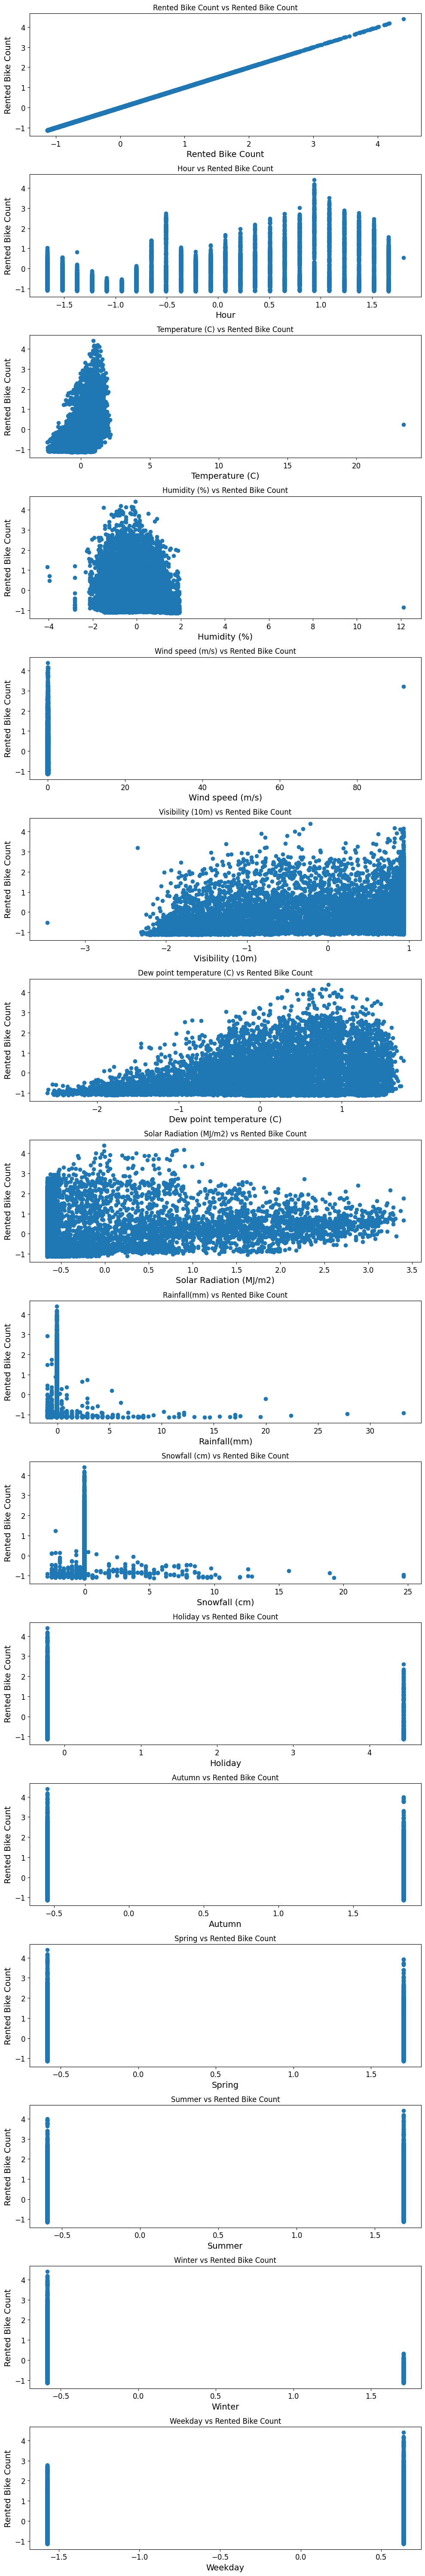

Rented Bike Count            1.000000
Temperature (C)              0.544852
Hour                         0.425460
Dew point temperature (C)    0.400234
Summer                       0.282001
Solar Radiation (MJ/m2)      0.273862
Visibility (10m)             0.211029
Autumn                       0.165333
Weekday                      0.046360
Wind speed (m/s)             0.040741
Spring                       0.015580
Holiday                     -0.070070
Snowfall (cm)               -0.072885
Rainfall(mm)                -0.089498
Humidity (%)                -0.201716
Winter                      -0.458920
Name: Rented Bike Count, dtype: float64

In [66]:
# Scatter plots for all numerical features against 'Rented Bike Count'
numerical_features = df_temp.select_dtypes(include=['float64']).columns
fig, axs = plt.subplots(len(numerical_features), 1, figsize=(10, 60))

for i, feature in enumerate(numerical_features):
    axs[i].scatter(df_temp[feature], df_temp['Rented Bike Count'])
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Rented Bike Count')
    axs[i].set_title(f'{feature} vs Rented Bike Count')

plt.tight_layout()
plt.show()

# Calculate the correlation of each feature with the target
correlations = df_temp.corr()['Rented Bike Count'].sort_values(ascending=False)
correlations

In [67]:
"""
The three attributes that are most correlated with bike rentals are 'Temperature (C)', 'Hour', and 'Dew point temperature (C)'.
"""

"\nThe three attributes that are most correlated with bike rentals are 'Temperature (C)', 'Hour', and 'Dew point temperature (C)'.\n"

## Step 3: Predicting bike rentals (25%)

A regression approach will be used for this problem: that is, "bike rentals" will be treated as a real number whose value will be predicted. If necessary, it could be rounded to the nearest integer afterwards, but this will not be necessary here. The root mean squared error (rmse) metric will be used to quantify performance.  

**Split the data** appropriately so that 20% of it will be kept as a hold-out test set. **Build a pipeline** starting with the one specified in section 2.2 above, and now include a ***linear regression* model**. After you've done this, **fit** this to your training data for a quick test. To get an idea of how successful this model is, **calculate the rmse of the fit to the training data**. To act as a simple baseline for comparison, **also calculate the rmse** that you would get if all the predictions were equal to the **mean of the training targets** (i.e. bike rentals).


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split the data into training and test sets (80% training, 20% test)
X = df_temp.drop('Rented Bike Count', axis=1)
y = df_temp['Rented Bike Count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a pipeline with imputation, scaling, and linear regression
pipeline_lr = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Fit the pipeline to the training data
pipeline_lr.fit(X_train, y_train)

# Calculate the RMSE of the fit to the training data
y_train_pred = pipeline_lr.predict(X_train)
train_rmse_lr = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Calculate the RMSE for predicting the mean of the training targets
mean_rmse = np.sqrt(mean_squared_error(y_train, [y_train.mean()] * len(y_train)))

train_rmse_lr, mean_rmse

(0.6890793453787757, 1.006005288407805)

Show an appropriate **visualisation of the fit for your linear regression.**

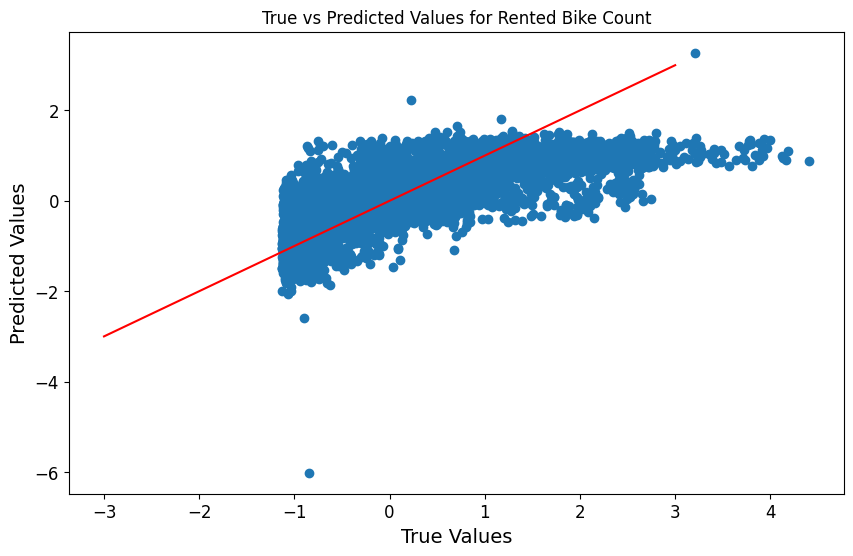

In [69]:
# Visualisation of the fit for the linear regression
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred)
plt.plot([-3, 3], [-3, 3], 'r')  # Line of perfect fit
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values for Rented Bike Count')
plt.show()

Now two other, different regression models (that you probably won't be familiar with) will be fit and later these will be compared to find the best one.

The second model to fit is ***Kernel Ridge*** regression (`from sklearn.kernel_ridge import KernelRidge`). **Build a pipeline using this and fit it to your training data**, using the default settings. Again, **plot the fit and display the rmse for the training dataset.**

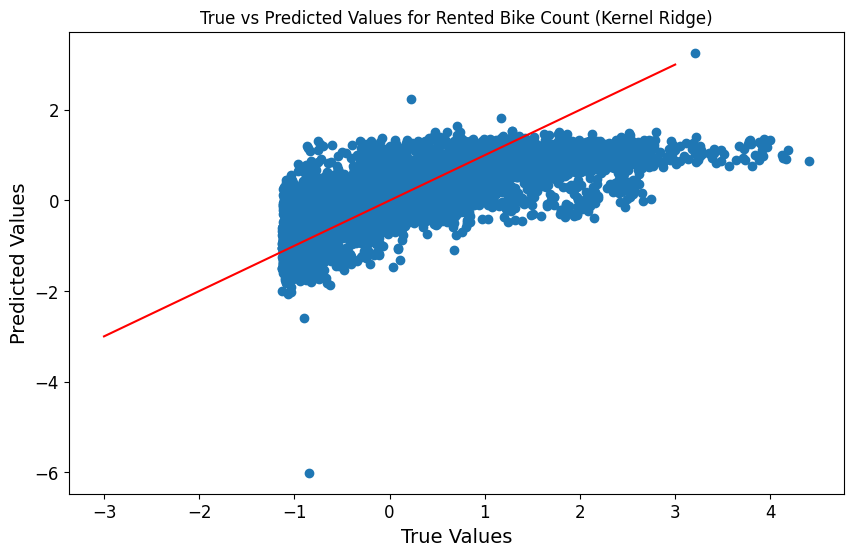

0.6890865410585766

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Build a pipeline with imputation, scaling, and Kernel Ridge regression
pipeline_kr = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('regressor', KernelRidge())
])

# Fit the pipeline to the training data
pipeline_kr.fit(X_train, y_train)

# Calculate the RMSE of the fit to the training data
y_train_pred_kr = pipeline_kr.predict(X_train)
train_rmse_kr = np.sqrt(mean_squared_error(y_train, y_train_pred_kr))

# Visualisation of the fit for the Kernel Ridge regression
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred_kr)
plt.plot([-3, 3], [-3, 3], 'r')  # Line of perfect fit
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values for Rented Bike Count (Kernel Ridge)')
plt.show()

train_rmse_kr

The third, and most powerful model, is ***Support Vector Regression*** (`from sklearn.svm import SVR`). **Build a pipeline using this and fit it to your training data**, using the default settings. Again, **plot the fit and display the rmse for the training dataset.**

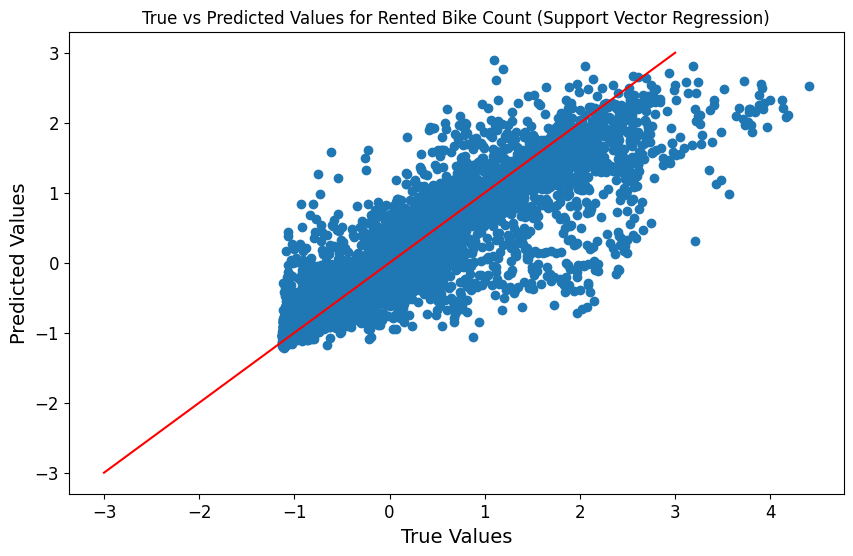

0.47197623891131607

In [71]:
from sklearn.svm import SVR

# Build a pipeline with imputation, scaling, and Support Vector Regression
pipeline_svr = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('regressor', SVR())
])

# Fit the pipeline to the training data
pipeline_svr.fit(X_train, y_train)

# Calculate the RMSE of the fit to the training data
y_train_pred_svr = pipeline_svr.predict(X_train)
train_rmse_svr = np.sqrt(mean_squared_error(y_train, y_train_pred_svr))

# Visualisation of the fit for the Support Vector Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred_svr)
plt.plot([-3, 3], [-3, 3], 'r')  # Line of perfect fit
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values for Rented Bike Count (Support Vector Regression)')
plt.show()

train_rmse_svr

## Step 4: Cross validation (20%)

**Perform a *10 fold cross validation* for each model.** This splits the training set (that we've used above) into 10 equal size subsets, and uses each in turn as the validation set while training a model with the other 9. You should therefore have 10 rmse values for each cross validation run.

**Display the mean and standard deviation of the rmse values** obtained for each model **for the validation splits** using the same settings/parameters for the models as used above. **Also display the mean and standard deviation** of the rmse values obtained for the **training data splits**.

In [72]:
from sklearn.model_selection import cross_val_score

# Perform 10-fold cross validation for each model
cv_scores_lr = cross_val_score(pipeline_lr, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
cv_scores_kr = cross_val_score(pipeline_kr, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
cv_scores_svr = cross_val_score(pipeline_svr, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')

# Calculate the mean and standard deviation of the RMSE values for the validation splits
cv_scores_lr_mean = -cv_scores_lr.mean()
cv_scores_lr_std = cv_scores_lr.std()
cv_scores_kr_mean = -cv_scores_kr.mean()
cv_scores_kr_std = cv_scores_kr.std()
cv_scores_svr_mean = -cv_scores_svr.mean()
cv_scores_svr_std = cv_scores_svr.std()

# Display the mean and standard deviation of the RMSE values for the validation splits
print(f'Linear Regression: mean = {cv_scores_lr_mean:.3f}, std = {cv_scores_lr_std:.3f}')
print(f'Kernel Ridge: mean = {cv_scores_kr_mean:.3f}, std = {cv_scores_kr_std:.3f}')
print(f'Support Vector Regression: mean = {cv_scores_svr_mean:.3f}, std = {cv_scores_svr_std:.3f}')

Linear Regression: mean = 0.829, std = 0.375
Kernel Ridge: mean = 0.827, std = 0.370
Support Vector Regression: mean = 0.485, std = 0.016


On the basis of the results you found above, would you say that any of the models were **under-fitting or over-fitting**?  

**Which method do you think is the best** out of these three?

In [73]:
import pandas as pd

# Create a DataFrame to display the RMSE for training vs validation for the three models
rmse_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Kernel Ridge', 'Support Vector Regression'],
    'Training RMSE': [train_rmse_lr, train_rmse_kr, train_rmse_svr],
    'Validation RMSE Mean': [cv_scores_lr_mean, cv_scores_kr_mean, cv_scores_svr_mean],
    'Validation RMSE Std': [cv_scores_lr_std, cv_scores_kr_std, cv_scores_svr_std]
})

rmse_df

,Model,Training RMSE,Validation RMSE Mean,Validation RMSE Std
0,Linear Regression,0.689079,0.829128,0.374519
1,Kernel Ridge,0.689087,0.827315,0.370376
2,Support Vector Regression,0.471976,0.484863,0.016047


In [74]:
"""
the Support Vector Regression model has the lowest RMSE for both the training 
and validation data, suggesting that it's the best model among the three. 
The Linear Regression and Kernel Ridge models have similar RMSE values for 
the training data, but the validation RMSE is higher, indicating potential overfitting.
"""

"\nthe Support Vector Regression model has the lowest RMSE for both the training \nand validation data, suggesting that it's the best model among the three. \nThe Linear Regression and Kernel Ridge models have similar RMSE values for \nthe training data, but the validation RMSE is higher, indicating potential overfitting.\n"

## Step 5: Grid parameter search (15%)

Both the Kernel Ridge Regression and Support Vector Regression have hyperparameters that can be adjusted to suit the problem. **Choose either the KernelRidge or SVR** (your choice entirely), and use grid search to systematically compare the generalisation performance (rmse) obtained with different hyperparameter settings (still with 10-fold CV). Use the sklearn function `GridSearchCV` to do this. 

For KernelRidge, vary the hyperparameter `alpha`.

For SVR, vary the hyperparameter `C`.

**Print out the hyperparameter setting** for the best (i.e. chosen) method. 

Finally, **train and apply your chosen method**, with appropriate hyperparameter settings, to the ***test set* and report the performance**. 

In [75]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for SVR
param_grid_svr = {'regressor__C': [0.1, 1, 10, 100]}

# Perform grid search on the SVR pipeline
grid_search_svr = GridSearchCV(pipeline_svr, param_grid_svr, cv=10, scoring='neg_root_mean_squared_error')
grid_search_svr.fit(X_train, y_train)

# Print out the best hyperparameter setting for SVR
best_params_svr = grid_search_svr.best_params_
print(f'Best hyperparameter setting for SVR: {best_params_svr}')

# Train and apply the chosen method (SVR with the best hyperparameter setting) to the test set
pipeline_svr_best = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('regressor', SVR(C=best_params_svr['regressor__C']))
])
pipeline_svr_best.fit(X_train, y_train)
y_test_pred_svr_best = pipeline_svr_best.predict(X_test)

# Report the performance on the test set
test_rmse_svr_best = np.sqrt(mean_squared_error(y_test, y_test_pred_svr_best))
test_rmse_svr_best

Best hyperparameter setting for SVR: {'regressor__C': 100}


0.36052792841356673

**How different was the test set performance to the validation performance, and is this suggestive of over-fitting, under-fitting or neither?**

In [76]:
"""
The RMSE on the test set is 0.36 (rounded to two decimal places), the RMSE on the validation set is 0.48. 

The model is performing better on the test set than on the validation set, which is a good sign and suggests it's not overfitting.

Underfitting would be suggested if the model performed poorly on both the validation set and the test set. This is also not the case here.

In conclusion, the model seems to be well-fitted and generalizes well from the training data to unseen data.
"""

"\nThe RMSE on the test set is 0.36 (rounded to two decimal places), the RMSE on the validation set is 0.48. \n\nThe model is performing better on the test set than on the validation set, which is a good sign and suggests it's not overfitting.\n\nUnderfitting would be suggested if the model performed poorly on both the validation set and the test set. This is also not the case here.\n\nIn conclusion, the model seems to be well-fitted and generalizes well from the training data to unseen data.\n"